In [1]:
import os
import numpy as np
import sys
sys.path.append('../')

from GA.geneticAlgorithm import TwoLevelGA


In [2]:
dataset = 'cifar10'

In [3]:
#experiments_folder = '../../exp_cifar10_time'
experiments_folder = '../../exp_cifar10_time_catv3'

def print_results(experiments_folder, p_val=True, p_test=True, p_winner=False):
    try:
        print("\n\n  ------  FOLDERNAME:", experiments_folder, "------\n")
        exp_folder = os.path.join(experiments_folder, dataset)
        folder = os.path.join(exp_folder, 'genetic')


        generational = TwoLevelGA.load_genetic_algorithm(folder=folder)
        print("Evolved til generation", generational.generation)
        if p_winner:
            winner = generational.best_individual['winner']
            print("Winner:\n", winner)
        if p_val:
            fit = generational.best_individual['best_fit']
            print("Val accuracy: ",1 - fit)
        if p_test:
            test = generational.best_individual["test"]
            print("Test accuracy:", 1 - test)
        print(generational.ti)
        return generational

        
    except:
        pass
    


In [5]:
exps = ['../../' + exp for exp in os.listdir('../../') if 'exp' in exp]
for exp in exps:
    print_results(exp, p_winner=True)



  ------  FOLDERNAME: ../../exp_op_coding_VM2 ------



  ------  FOLDERNAME: ../../exp_complete_skip ------

Loading file ../../exp_complete_skip/cifar10/genetic/0_2019-11-15-16:57/GA_experiment


Using TensorFlow backend.


Evolved til generation 30
Winner:
 CNN|F:45|K:(3,3)|A:relu|D:0.387|M:0
CNN|F:102|K:(3,5)|A:relu|D:0.305|M:1
CNN|F:107|K:(3,3)|A:relu|D:0.273|M:0
CNN|F:107|K:(3,3)|A:relu|D:0.173|M:0
CNN|F:94|K:(5,3)|A:elu|D:0.347|M:1
CNN|F:60|K:(7,7)|A:elu|D:0.473|M:0
CNN|F:31|K:(5,7)|A:prelu|D:0.711|M:0
1
01
001
0001
00001
000001

Val accuracy:  0.9097
Test accuracy: 0.903
1573847830.8957543


  ------  FOLDERNAME: ../../exps ------

Loading file ../../exps/cifar10/genetic/3_2019-11-13-17:59/GA_experiment
Evolved til generation 16
Winner:
 CNN|F:24|K:(5,5)|A:relu|D:0.293|M:0
CNN|F:93|K:(3,7)|A:relu|D:0.267|M:0
CNN|F:90|K:(7,7)|A:relu|D:0.269|M:0
CNN|F:90|K:(3,7)|A:relu|D:0.323|M:1
CNN|F:88|K:(5,7)|A:elu|D:0.432|M:1
CNN|F:56|K:(5,5)|A:elu|D:0.312|M:1
CNN|F:45|K:(5,7)|A:prelu|D:0.219|M:0
1
01
001
0001
00001
100001

Val accuracy:  0.9035
Test accuracy: 0.8993
1573678761.0196586


  ------  FOLDERNAME: ../../exp_op_coding2 ------

Loading file ../../exp_op_coding2/cifar10/genetic/0_2019-11-26-01:38/GA_exp

In [41]:
experiments_folder = '../../exp_cifar10_time_catv3'

generational = print_results(experiments_folder)



  ------  FOLDERNAME: ../../exp_cifar10_time_catv3 ------

Loading file ../../exp_cifar10_time_catv3/cifar10/genetic/0_2019-12-23-01:42/GA_experiment
Evolved til generation 20
Val accuracy:  0.938033
Test accuracy: 0.9480999999999999
1577076123.0267317


20
(21,)


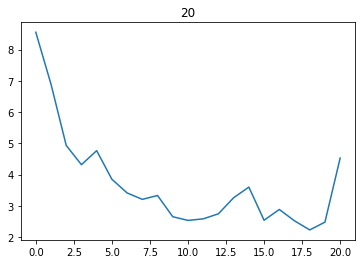

In [59]:
import matplotlib.pyplot as plt

h = generational.history
gens = np.sum(h, axis=0)

new_gens = []
for i, g in enumerate(gens):
    if g > 0.01:
        new_gens.append(g)
    else:
        break
print(i)
i = i-1
print(gens.shape)
plt.plot(new_gens)
plt.title("%d" % generational.generation)
plt.show()


(20, 19)


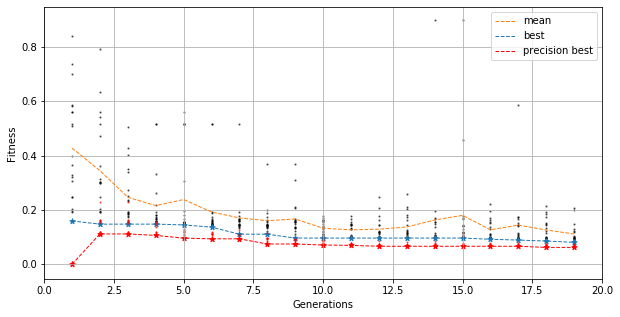

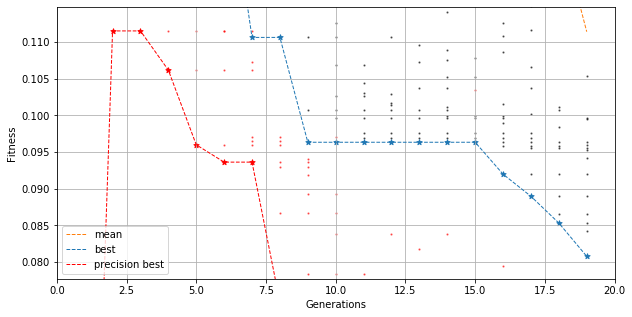

In [60]:
h2 = h[:, 0:i]
hp = generational.history_precision
hp2 = hp[:, 0:i]
print(h2.shape)
generational.history = h2
generational.history_precision = hp2
generational.show_history()